# Laboratorio 7
Diego Ruiz

El contexto del problema para este laboratorio es que se tiene un set de datos sobre clientes de un banco de India con mas de 1M de transacciones. Los  bancos, en su mayoría, tienen una gran base de clientes, y se tiene información de estos clientes como lo puede ser su edad, ingresos, valores, estilo de vida, etc. Lo que se busca con este laboratorio es realizar la segmentación de clientes, es decir, dividirlos en grupos específicos basados en características compartidas. Para esto utilizaremos K-means.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, learning_curve
from sklearn import metrics

from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.feature_selection import mutual_info_classif, SelectKBest
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('ggplot')

### Exploración de Datos
Importamos el dataet y realizamos una breve exploración con los datos para determinar si es necesario realizar limpieza, encoding y/o balanceo.

In [2]:
data = pd.read_csv('bank_transactions.csv')

data.head(25)

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.00
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.00
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.00
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.00
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.50
5,T6,C1536588,8/10/72,F,ITANAGAR,53609.20,2/8/16,173940,676.00
6,T7,C7126560,26/1/92,F,MUMBAI,973.46,2/8/16,173806,566.00
7,T8,C1220223,27/1/82,M,MUMBAI,95075.54,2/8/16,170537,148.00
8,T9,C8536061,19/4/88,F,GURGAON,14906.96,2/8/16,192825,833.00
9,T10,C6638934,22/6/84,M,MUMBAI,4279.22,2/8/16,192446,289.11


CustAccountBalance


C:\Users\yeyoc\AppData\Local\Temp\ipykernel_29940\638141354.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[stat])


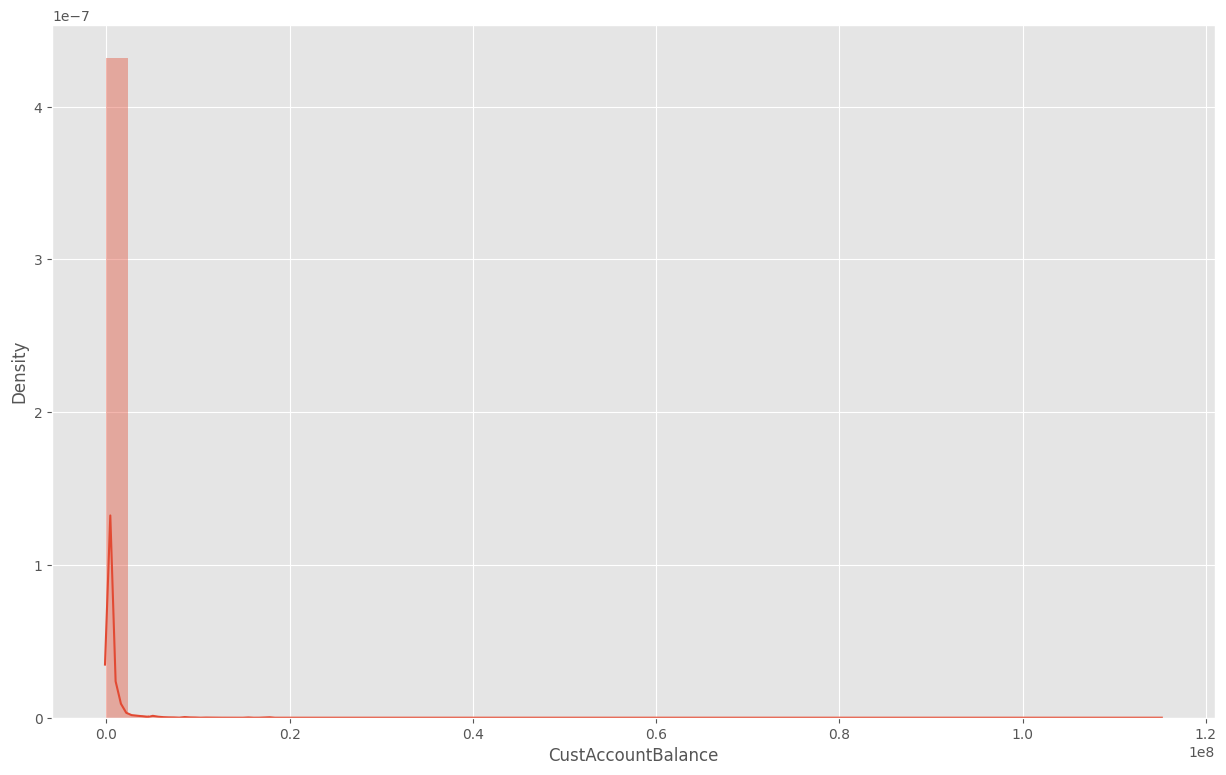

TransactionTime


C:\Users\yeyoc\AppData\Local\Temp\ipykernel_29940\638141354.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[stat])


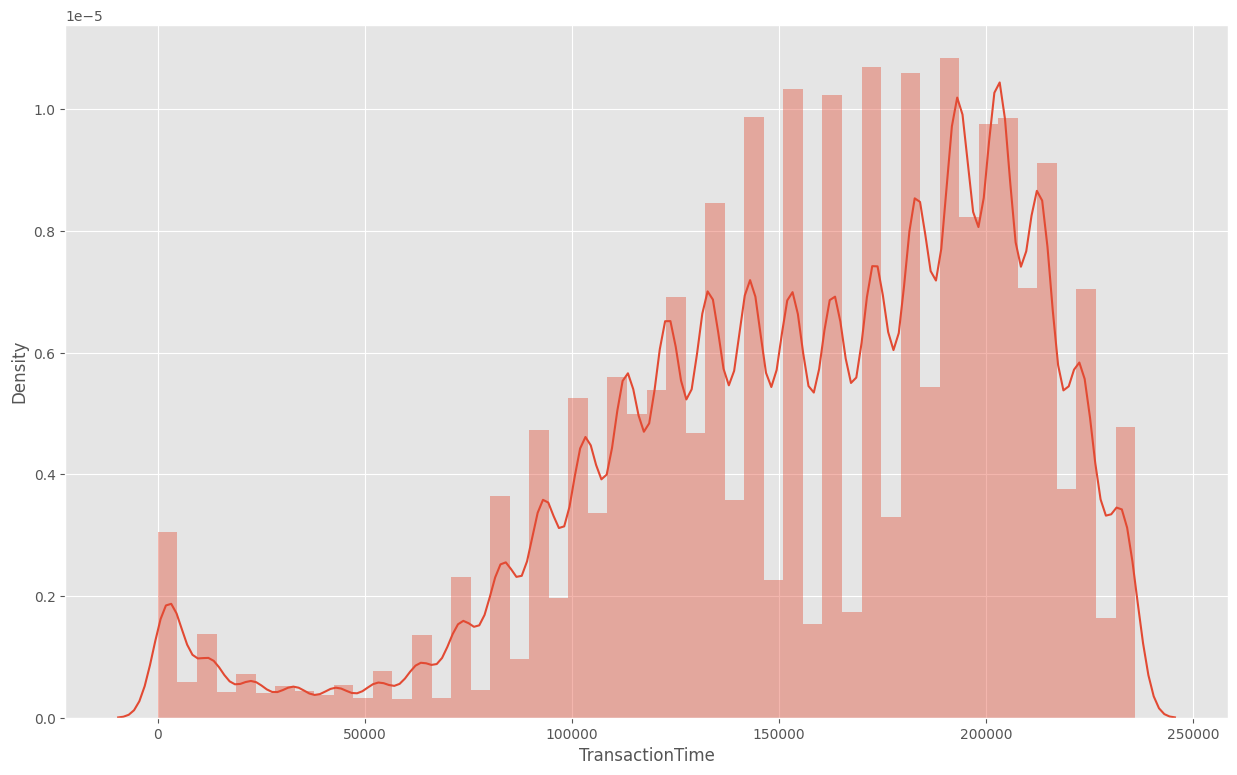

TransactionAmount (INR)


C:\Users\yeyoc\AppData\Local\Temp\ipykernel_29940\638141354.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[stat])


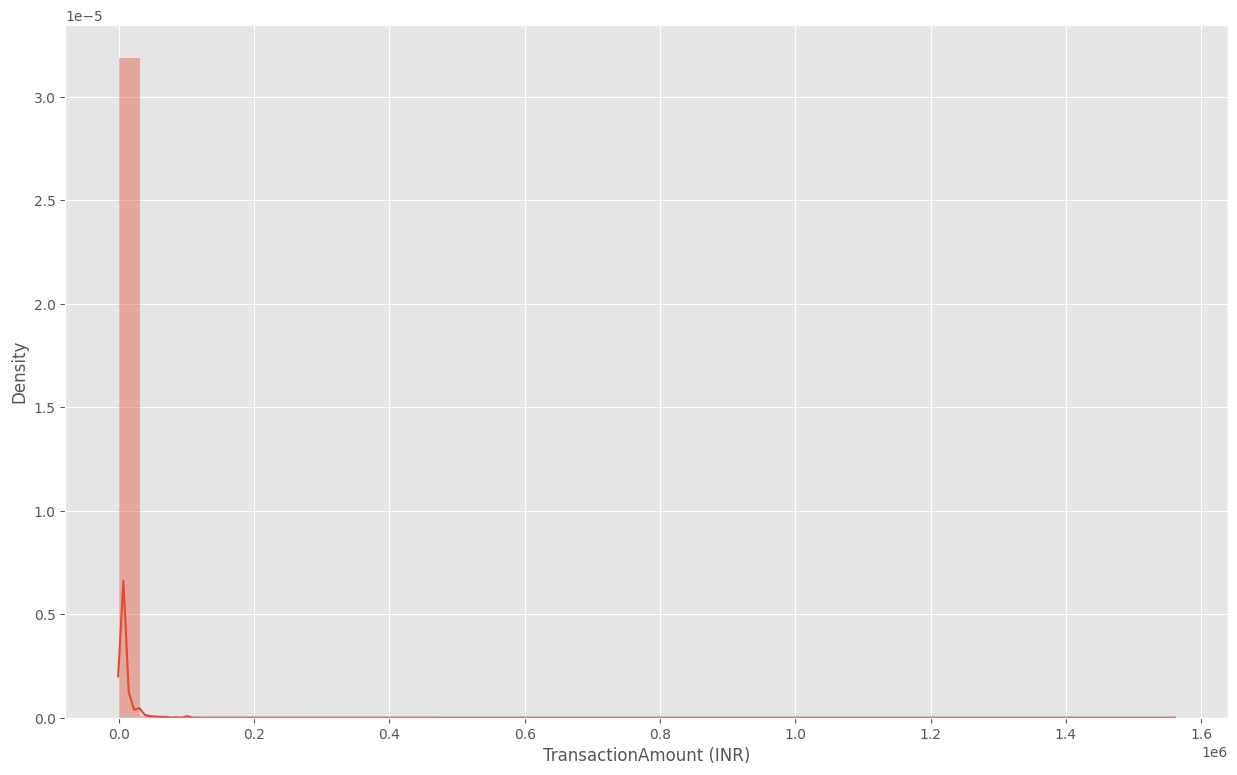

In [3]:
from pandas.api.types import is_numeric_dtype

for stat in data.columns:
    if is_numeric_dtype(data[stat]):
        print(stat)
        sns.distplot(data[stat])
        plt.show()

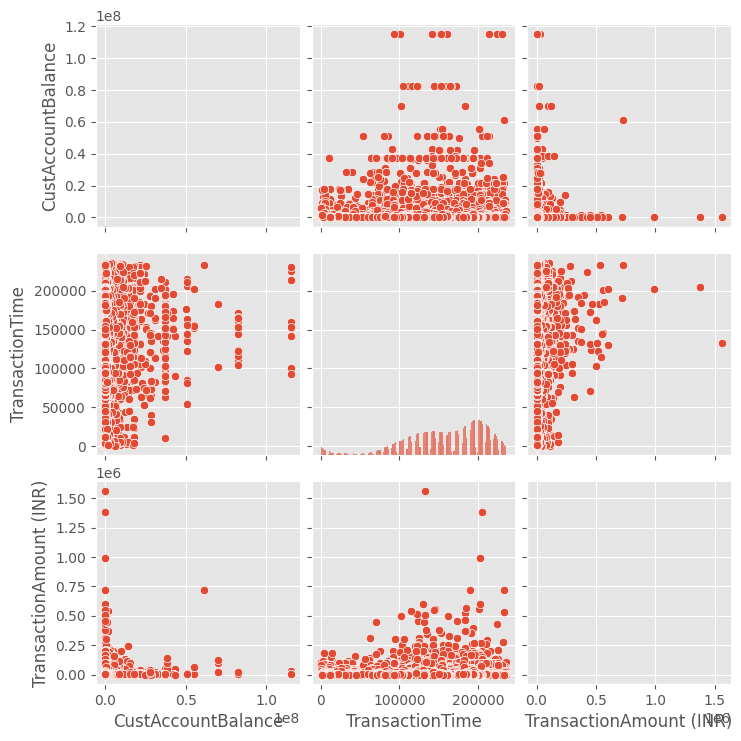

In [4]:
sns.pairplot(data)

Se encontró que existen dos columnas que no serán de utilidad para la segmentación de clientes, TransactionID y CustomerID. Por tanto, se eliminaron. Además, la fecha y hora de las transacciones son irrelevantes para el tipo de cliente que sea, por lo que tampoco se trabajará con ellas.

In [5]:
data = data.drop(['TransactionID'], axis=1)
data = data.drop(['CustomerID'], axis=1)
data = data.drop(['TransactionDate'], axis=1)
data = data.drop(['TransactionTime'], axis=1)

##### Datos Faltantes
Primero, utilizamos la libreria de seaborn para visualizar los datos faltantes en caso de existir y determinar la forma de rellenarlos o descartarlos.

In [6]:
# Porcentaje de datos nulos del dataset con las columnas esperadas.
null_data = data.isnull().sum()
null_data = null_data / len(data)
perc = null_data.sum() * 100
perc = "{:.2f}".format(perc)
print(perc, '%')

0.67 %


Podemos observar que el porcentaje de datos faltantes del dataset es del 0.67%, lo cual es realmente bajo, a continuación veremos en qué columnas se encuentran estos valores.

Index(['CustomerDOB', 'CustGender', 'CustLocation', 'CustAccountBalance'], dtype='object')

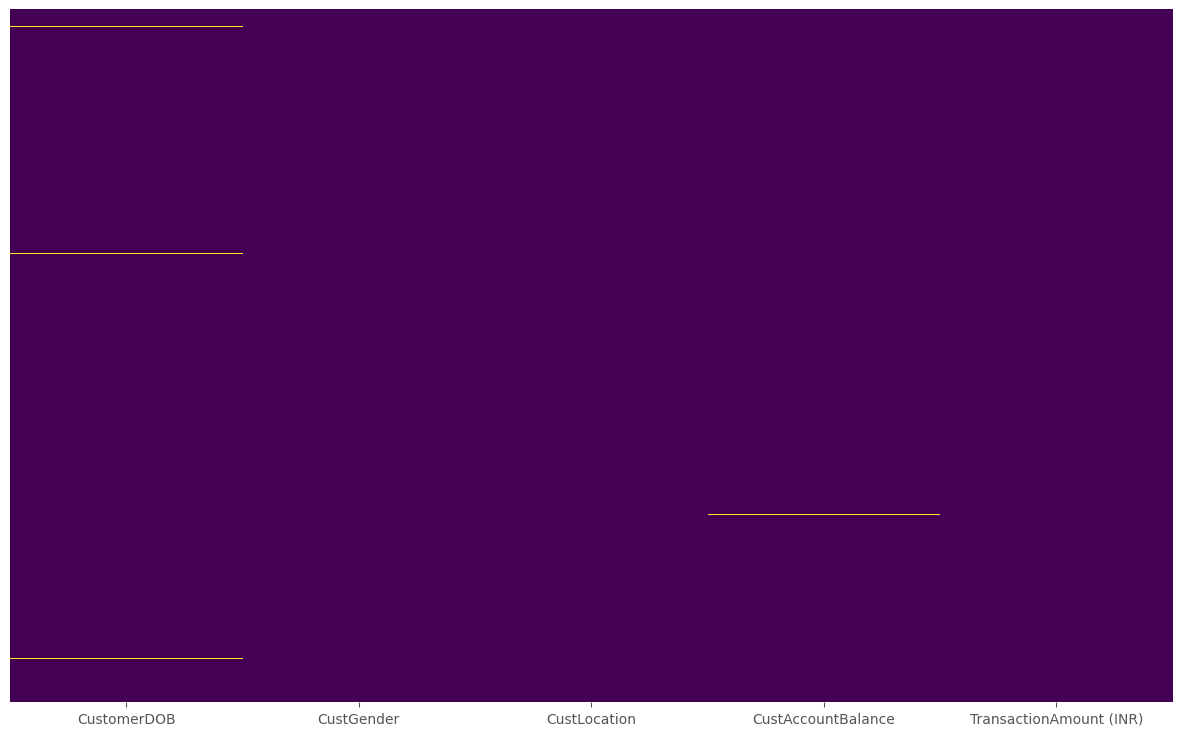

In [7]:
sns.heatmap(data.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')
data.columns[data.isnull().any()]

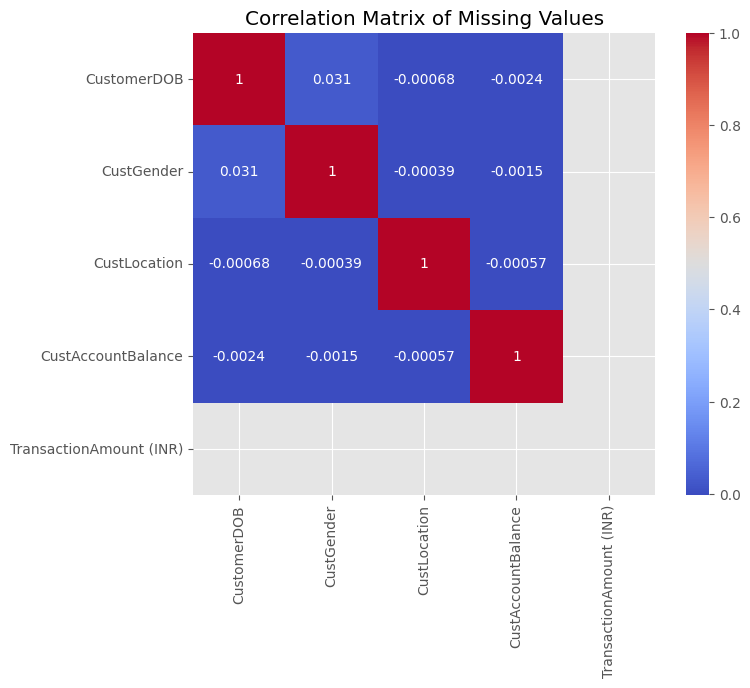

In [8]:
# Coolwarm de la relacion de datos faltantes
missing_corr = data.isnull().corr()
plt.figure(figsize=(8, 6))
sns.heatmap(missing_corr, cmap='coolwarm', annot=True, square=True)
plt.title('Correlation Matrix of Missing Values')
plt.show()


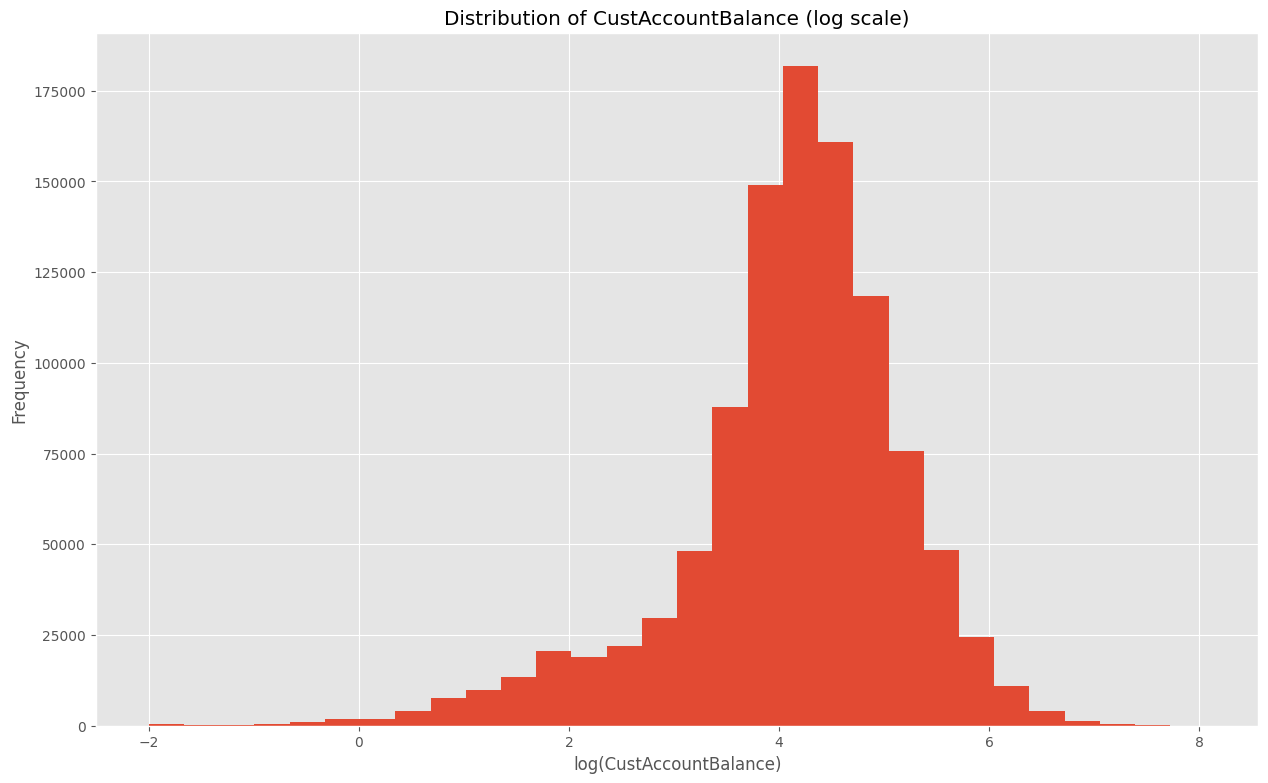

In [9]:
data_clean = data[data['CustAccountBalance'] > 0]
log_data = np.log10(data_clean['CustAccountBalance'])

# Histograma
plt.hist(log_data, bins=30)
plt.xlabel('log(CustAccountBalance)')
plt.ylabel('Frequency')
plt.title('Distribution of CustAccountBalance (log scale)')
plt.show()


Se encontró que los datos faltantes se encuentran mayoritariamente en CustomerDOB y CustAccountBalance, pero también en CustGender y CustLocation. Además, se intentó encontrar una relación para los datos faltantes, pero se encontró que las relaciones no son significativas, por lo que se determinó que los datos faltantes se pueden tratar como aleatorios y se puede rellenar estos datos. <br>
Para CustomerDOB, CustGender y CustLocation, se utilizará la moda porque no son valores continuos. Para CustAccountBalance, se utilizó la media porque son valores numéricos con distribución normal. 

In [10]:
data['CustomerDOB'].fillna(data['CustomerDOB'].mode()[0], inplace=True)
data['CustGender'].fillna(data['CustGender'].mode()[0], inplace=True)
data['CustLocation'].fillna(data['CustLocation'].mode()[0], inplace=True)

data['CustAccountBalance'].fillna(data['CustAccountBalance'].mean(), inplace=True)

data.columns[data.isnull().any()]

Index([], dtype='object')

##### Encoding de variables
Primero, determinamos qué variables debemos convertir y determinar la mejor forma de hacerlo. Para CustomerDOB se determinó que la información de utilidad es la edad y por tanto se reemplazará por este dato. Luego, para CustGender y CustLocation se decidió realizar el proceso de encoding para que fueran numéricas.

In [11]:
data.dtypes

CustomerDOB                 object
CustGender                  object
CustLocation                object
CustAccountBalance         float64
TransactionAmount (INR)    float64
dtype: object

In [12]:
data['CustAge'] = '19' + data['CustomerDOB'].str[-2:]
data['CustAge'] = data['CustAge'].astype(int)
data['CustAge'] = 2023 - data['CustAge']

data = data.drop(['CustomerDOB'], axis=1)

In [13]:
le = LabelEncoder()
data = data[data["CustGender"] != "T"]
data["CustGender"] = le.fit_transform(data["CustGender"])

data["CustLocation"] = le.fit_transform(data["CustLocation"])

data.head()

,CustGender,CustLocation,CustAccountBalance,TransactionAmount (INR),CustAge
0,0,3586,17819.05,25.0,29
1,1,3648,2270.69,27999.0,66
2,0,5268,17874.44,459.0,27
3,0,5268,866503.21,2060.0,50
4,0,5657,6714.43,1762.5,35


##### Balanceo de dataset
Debemos verificar qué variables son necesarias de balancear y aplicar una técnica para balancearlas.

In [14]:
categorical_columns = ['CustGender', 'CustLocation','CustAge']
for column in categorical_columns:
    print(data[column].value_counts())

CustGender
1    766630
0    281936
Name: count, dtype: int64
CustLocation
5268    103746
5792     84928
772      81555
3083     73818
2075     71019
         ...  
7100         1
8643         1
6541         1
1882         1
3431         1
Name: count, Length: 9355, dtype: int64
CustAge
33     72789
32     71288
34     69238
31     66708
35     63004
       ...  
103        2
112        2
107        2
98         1
105        1
Name: count, Length: 99, dtype: int64


Se determinó que la única variable que necesita balanceo es CustGender y se utilizará SMOTE para realizar el balanceo.

In [15]:
X = data.drop('CustGender', axis=1)
y = data['CustGender']

smote = SMOTE()
X_balanced, y_balanced = smote.fit_resample(X, y)

data = pd.concat([X_balanced, y_balanced], axis=1)

print(data['CustGender'].value_counts())

CustGender
0    766630
1    766630
Name: count, dtype: int64


##### Escalar variables
Para escalar las variables y normalizar se utilizó sklearn. Se decidio utilizar MinMaxScaler por su capacidad de mantener la relación entre los datos y de mantener el rango de datos original. CustLocation es una variable nominal por lo que se decide no escalarla al igual que CustGender, que además ya se encuentra en un rango de 0 a 1.

In [16]:
scaler = MinMaxScaler()
columns_to_scale = ['CustAccountBalance', 'TransactionAmount (INR)', 'CustAge']

data[columns_to_scale]= scaler.fit_transform(data[columns_to_scale])
data.head()

,CustLocation,CustAccountBalance,TransactionAmount (INR),CustAge,CustGender
0,3586,0.000155,0.000016,0.050505,0
1,3648,0.000020,0.017948,0.424242,1
2,5268,0.000155,0.000294,0.030303,0
3,5268,0.007532,0.001320,0.262626,0
4,5657,0.000058,0.001130,0.111111,0


##### Selección de Variables
Para la selección de variables, inicialmente se determinó que las cosas que más nos interesa saber sobre los clientes del banco son el grupo de edad al que pertenecen, sus ingresos y su estilo de vida. Para conocer el grupo de edad y estilo de vida se pensó en usar las columnas CustLocation y CustAge y posiblemente CustGender. Para determinar ingresos y en general las cantidades de dinero que mueven era bastante claro que necesitabamos CustAccountBalance y TransactionAmount, siendo la segunda la más importante. <br>
Tras ver la relación que tenían las variables se encontró que CustLocation y CustGender tenían muy poco impacto en las demás variables, por lo que se optó por descartarlas. <br><br>
Recordando el objetivo principal de nuestra segmentación de clientes de una entidad bancaria para poder así tomar decisiones a nivel comercial y potenciar las operaciones de la empresa, se define que la varibale principal debe ser CustAccountBalance.

In [17]:
corr = data.corr()['CustAccountBalance'].abs().sort_values(ascending=False)
corr

CustAccountBalance         1.000000
CustAge                    0.096699
TransactionAmount (INR)    0.057940
CustGender                 0.005054
CustLocation               0.002544
Name: CustAccountBalance, dtype: float64

In [18]:
corr = data.corr()['CustAge'].abs().sort_values(ascending=False)
corr

CustAge                    1.000000
CustGender                 0.104495
TransactionAmount (INR)    0.103927
CustAccountBalance         0.096699
CustLocation               0.014787
Name: CustAge, dtype: float64

Tras este análisis se decide utilizar CustAccountBalance, CustAge y TransactionAmount (INR).

In [19]:
X = data[['CustAge', 'CustAccountBalance', 'TransactionAmount (INR)']].values

##### Modelo Kmeans sin librerias

In [20]:
def euclidean(X, centroids):
    return np.sqrt(np.sum((X - centroids[:, np.newaxis])**2, axis=2))

def k_means(X, k, max_iters=100):
    # Initialize centroids randomly
    centroids = X[np.random.choice(X.shape[0], k, replace=False), :]
    
    for _ in range(max_iters):
        # Calculate distances between data points and centroids
        distances = euclidean(X, centroids)
        
        # Assign data points to nearest centroids
        cluster_assignments = np.argmin(distances, axis=0)
        
        # Update centroids
        centroids_tmp = np.zeros((k, X.shape[1]))
        for i in range(k):
            centroids_tmp[i, :] = np.mean(X[cluster_assignments == i, :], axis=0)
        
        # Check convergence
        if np.allclose(centroids, centroids_tmp):
            break
        
        centroids = centroids_tmp
    
    return centroids, cluster_assignments


In [21]:
def calculate_WSS(X, kmax):
  wss = []
  for k in range(1, kmax+1):
    centroids, cluster_assignments = k_means(X, k)
    wss_score = 0
    for i in range(len(X)):
      curr_center = centroids[cluster_assignments[i]]
      wss_score += (X[i, 0] - curr_center[0]) ** 2 + (X[i, 1] - curr_center[1]) ** 2
      
    print("Número de clusters:",k, "   Métrica WSS:", wss_score)
    wss.append(wss_score)

  return wss


1. No se realiza un split del dataset porque el problema no es de aprendizaje supervisado, lo único que queremos hacer es agrupar los datos que tenemos de la mejor manera posible y no nos interesa que el algoritmo sea bueno haciendo esta agrupación en datos que no ha visto. <br>
2. Para encontrar el número de clusters se decidió usar una gráfica de codo. La manera en que se decidirá por medio de este análisis es utilizando la métrica WSS (Within-Cluster Sum of Squares). WSS nos indica la calidad del agrupamiento en K-means para un número específico de clusters y se encuentra sumando las distancias al cuadrado entre los puntos y el centroide del grupo en el que están. <br>

Número de clusters: 1    Métrica WSS: 63019.33866654024
Número de clusters: 2    Métrica WSS: 11253.34243009876
Número de clusters: 3    Métrica WSS: 4432.598096220936
Número de clusters: 4    Métrica WSS: 2437.4475397805422
Número de clusters: 5    Métrica WSS: 1587.3330522835379
Número de clusters: 6    Métrica WSS: 1197.5074797352543
Número de clusters: 7    Métrica WSS: 1281.1727731223955
Número de clusters: 8    Métrica WSS: 812.5936345284784


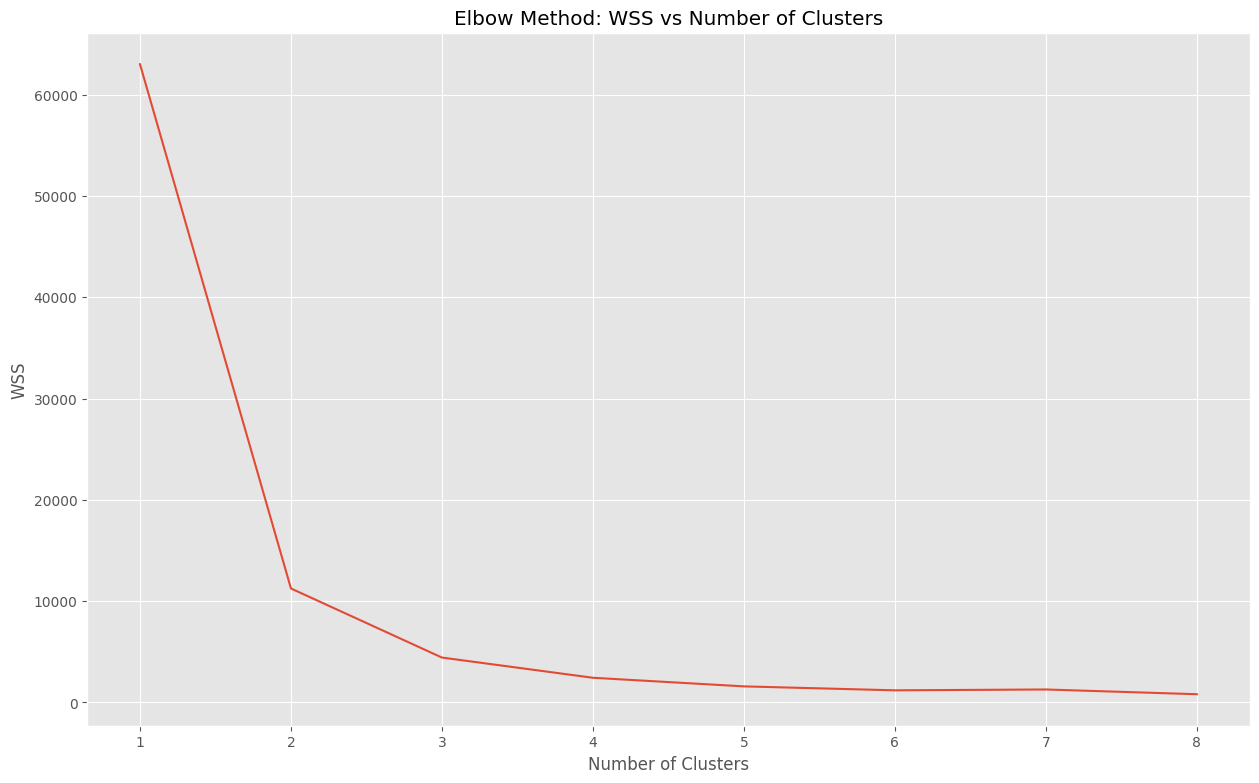

In [22]:
wss = calculate_WSS(X, kmax=8)

plt.plot(range(1, 9), wss)
plt.xlabel('Number of Clusters')
plt.ylabel('WSS')
plt.title('Elbow Method: WSS vs Number of Clusters')
plt.show()

3. Principal Component Analysis (PCA) es una técnica de análisis de datos utilizado en datasets de gran tamaño para poder reducir la dimensión del conjunto de datos. Esto lo hace extrayendo características importantes y eliminando las que son irrelevantes o repetidas. Al utilizar esta técnica nos podemos ahorrar mucho trabajo en la limpieza del dataset, pero siempre manteniendo la información importante del dataset y las relaciones relativas entre las variables. Se basa en la idea de que las variables originales están altamente correlacionadas entre sí, y que es posible expresarlas en términos de unas pocas variables independientes, llamadas componentes principales. <br>
En el 
Como se puede observar, los datos ya se habían preprocesados de buena manera, por lo que PCA no tiene mucho impacto en la calidad de los clusters, pero si tiene el potencial de mejorarlos en datasets con demasiadas features y con datos redundantes.

Número de clusters: 1    Métrica WSS: 63019.69090028642
Número de clusters: 2    Métrica WSS: 11253.581114372795
Número de clusters: 3    Métrica WSS: 4432.721072152576
Número de clusters: 4    Métrica WSS: 2437.5347630941897
Número de clusters: 5    Métrica WSS: 1587.4166850900726
Número de clusters: 6    Métrica WSS: 1280.481673505108
Número de clusters: 7    Métrica WSS: 917.8210453367719
Número de clusters: 8    Métrica WSS: 773.718052745754


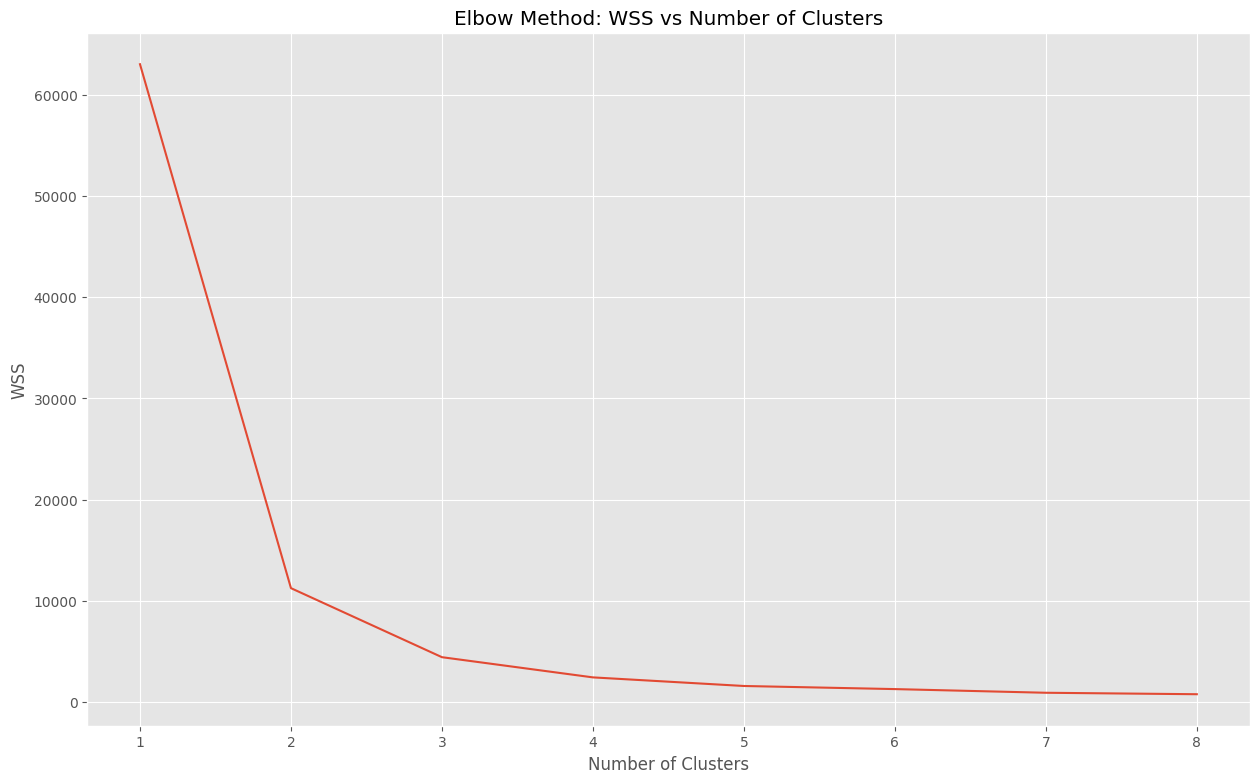

In [23]:
from sklearn.decomposition import PCA

def calculate_WSS_w_PCA(X, kmax):
  wss = []
  for k in range(1, kmax+1):
    
    pca = PCA(n_components=2)
    X = pca.fit_transform(X)

    centroids, cluster_assignments = k_means(X, k)
    wss_score = 0
    for i in range(len(X)):
      curr_center = centroids[cluster_assignments[i]]
      wss_score += (X[i, 0] - curr_center[0]) ** 2 + (X[i, 1] - curr_center[1]) ** 2
      
    print("Número de clusters:",k, "   Métrica WSS:", wss_score)
    wss.append(wss_score)

  return wss

wss = calculate_WSS_w_PCA(X, kmax=8)

plt.plot(range(1, 9), wss)
plt.xlabel('Number of Clusters')
plt.ylabel('WSS')
plt.title('Elbow Method: WSS vs Number of Clusters')
plt.show()

4. A continuación, se presenta los clusters generados, con 3 como el número de clusters seleccionado en base a la gráfica de codo y sus respectivas métricas de WSS. Se decidió graficar con CustAge porque era la más significativa.

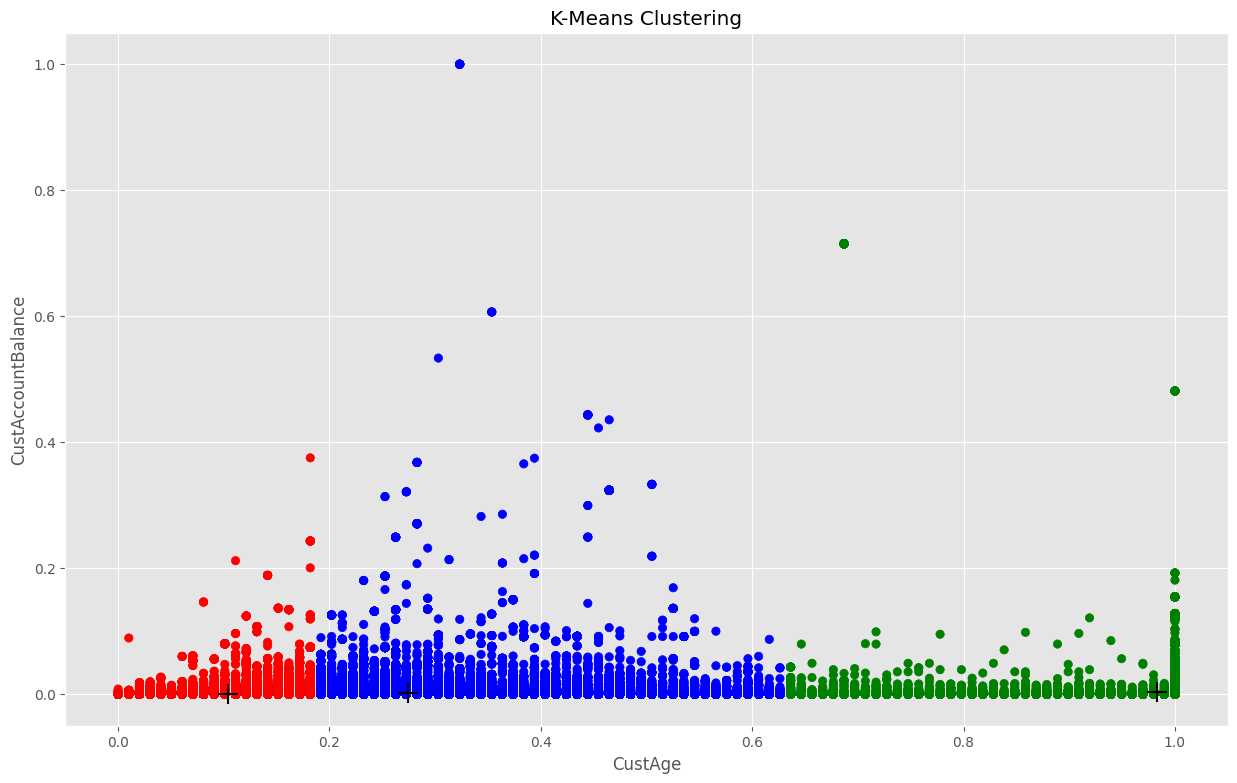

In [24]:
centroids, cluster_assignments = k_means(X, 3)
colormap = np.array(['r', 'g', 'b'])

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(data['CustAge'], data['CustAccountBalance'], c=colormap[cluster_assignments])
ax.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='+', s=200)

ax.set_xlabel('CustAge')
ax.set_ylabel('CustAccountBalance')
ax.set_title('K-Means Clustering')

plt.show()

5. Se escogieron como métricas de desempeño del clustering los índices de Davies Boudlin (DBI) y Calinski Harabasz (CHI). <br>
El DBI mide la similitud y disimilitud promedio entre clusteres. Su objetivo es minimizar la variación dentro de los grupos y maximizar las distancias entre grupos. La manera es que se mide es que cuánto menor, o más cercano a 0 sea el DBI, mejores son los clusters. <br>
Por otro lado, el CHI calcula la relación entre la dispersión entre clusters y la dispersión dentro de los grupos. Busca maximizar la varianza entre clusters y minimizar la varianza dentro de los clusters individuales. Para el CHI, las puntuaciones de CHI más altas indican grupos mejor definidos y bien separados.

In [25]:
print("DBI:", metrics.davies_bouldin_score(X, cluster_assignments))
print("CHI:", metrics.calinski_harabasz_score(X, cluster_assignments))

DBI: 0.4359511664337477
CHI: 10077069.205960162


##### Modelo Kmeans usando librerias

Número de clusters: 1    Métrica WSS: 63019.338666535084
Número de clusters: 2    Métrica WSS: 11253.34243009927
Número de clusters: 3    Métrica WSS: 4432.598096221096
Número de clusters: 4    Métrica WSS: 2437.447539780571
Número de clusters: 5    Métrica WSS: 1587.3330522835618
Número de clusters: 6    Métrica WSS: 1077.686871889381
Número de clusters: 7    Métrica WSS: 876.1540514826395
Número de clusters: 8    Métrica WSS: 681.016501546319


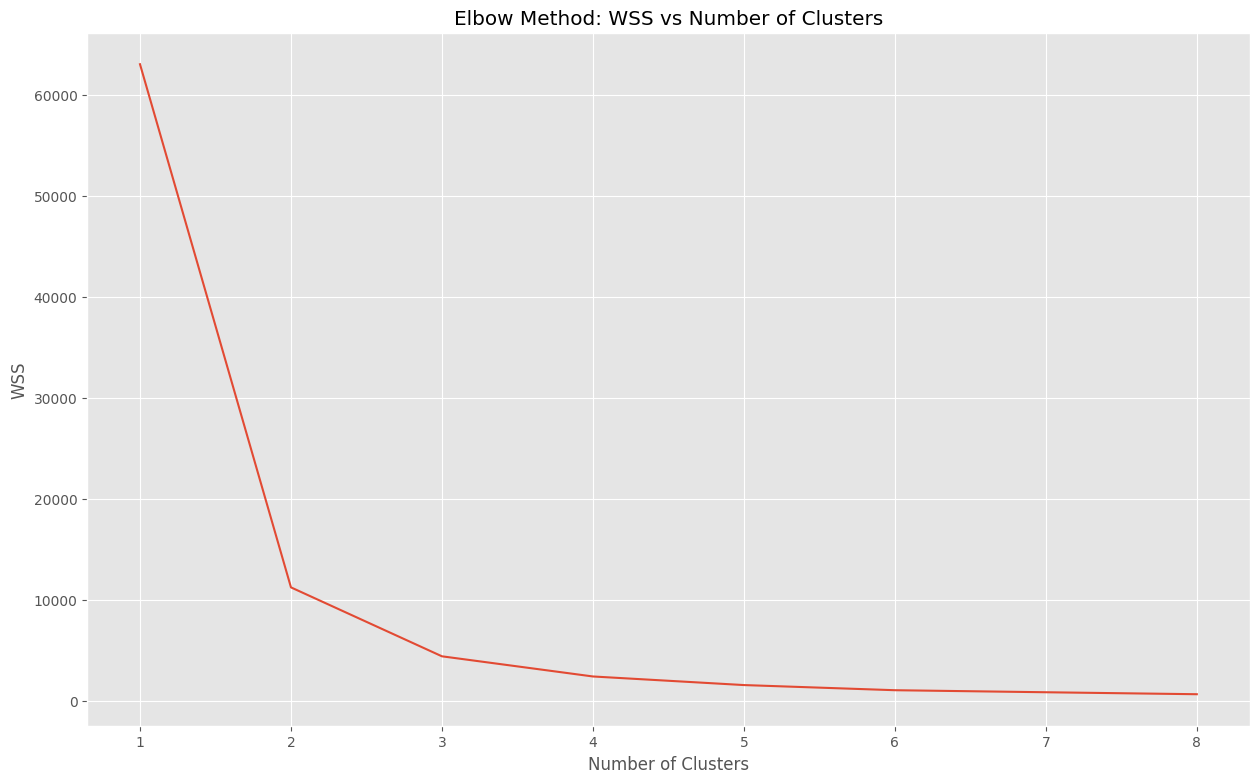

In [26]:
from sklearn.cluster import KMeans

def calculate_WSS_w_Lib(X, kmax):
  wss = []
  for k in range(1, kmax+1):
    KmeansLib = KMeans(n_clusters = k, n_init='auto').fit(X)
    centroids = KmeansLib.cluster_centers_
    pred_clusters = KmeansLib.predict(X)
    wss_score = 0
    for i in range(len(X)):
      curr_center = centroids[pred_clusters[i]]
      wss_score += (X[i, 0] - curr_center[0]) ** 2 + (X[i, 1] - curr_center[1]) ** 2
      
    print("Número de clusters:",k, "   Métrica WSS:", wss_score)
    wss.append(wss_score)

  return wss

wss = calculate_WSS_w_Lib(X, kmax=8)

plt.plot(range(1, 9), wss)
plt.xlabel('Number of Clusters')
plt.ylabel('WSS')
plt.title('Elbow Method: WSS vs Number of Clusters')
plt.show()

Nuevamente, se encontró que el número de clusters ideal es 3.

c:\Users\yeyoc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


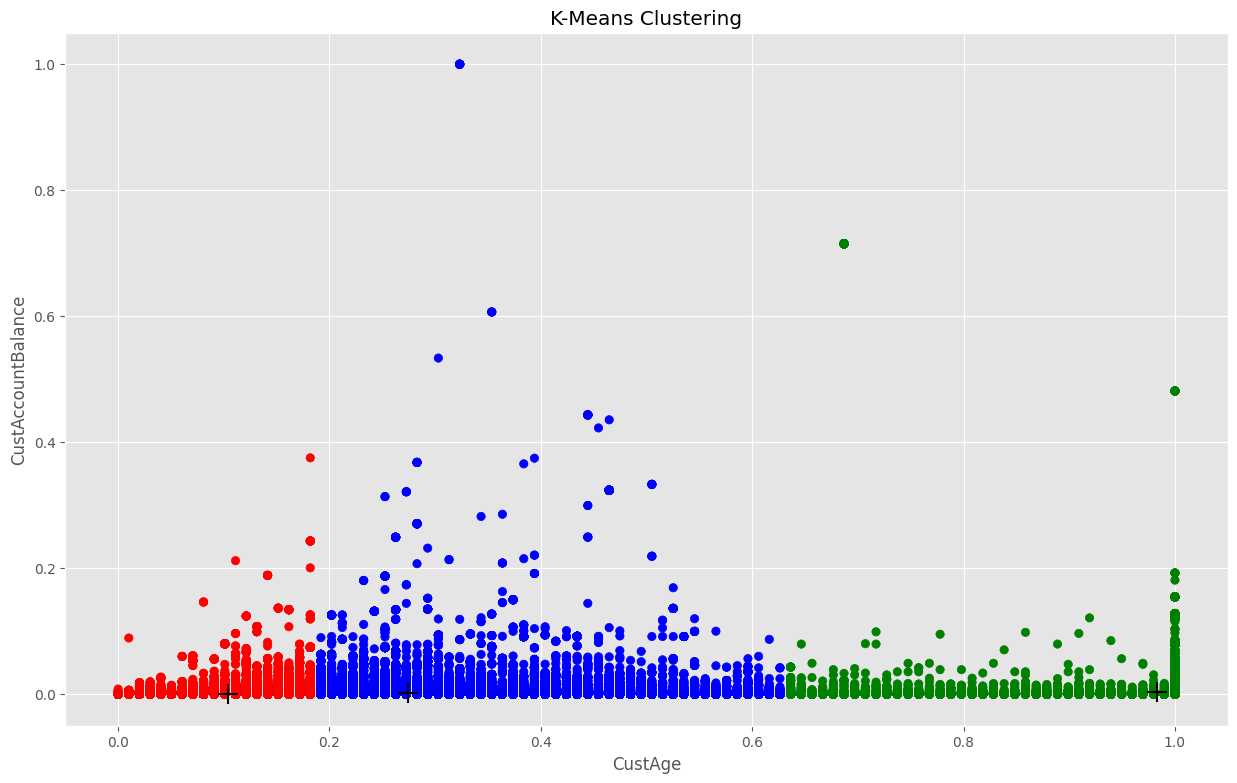

In [27]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)

centroids = kmeans.cluster_centers_
cluster_assign = kmeans.labels_
colormap = np.array(['r', 'g', 'b'])

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(data['CustAge'], data['CustAccountBalance'], c=colormap[cluster_assign])
ax.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='+', s=200)

ax.set_xlabel('CustAge')
ax.set_ylabel('CustAccountBalance')
ax.set_title('K-Means Clustering')

plt.show()

In [29]:
print("DBI:", metrics.davies_bouldin_score(X, cluster_assign))
print("CHI:", metrics.calinski_harabasz_score(X, cluster_assign))

DBI: 0.4359511664337477
CHI: 10077069.205960162
